In [1]:
from surprise import NMF
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import numpy as np
import pandas as pd
from collections import defaultdict

# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

In [2]:
# Read the course rating dataset with columns user item rating
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

coruse_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

In [3]:
def precision_recall_at_k(predictions, k=10, threshold=2.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

#Get average precision and recalls
def average_dicts(dictionary):
    sum = 0
    count = 0
    for value in dictionary.values():
        sum += value
        count += 1
    return sum / count

In [4]:
# Split the data into a training set and a test set
trainset, testset = train_test_split(coruse_dataset, test_size=.25)

# Define the NMF model
model_1 = NMF(n_factors=15, n_epochs=50)

# Train the model on the training data
model_1.fit(trainset)


# Classify the items in the test set
predictions_1 = model_1.test(testset)

#Precisions and recalls
precisions, recalls = precision_recall_at_k(predictions = predictions_1, k=10, threshold=2.5)


# Get average Precision and recalls
precision_average = average_dicts(precisions)
recalls_average = average_dicts(recalls)


#f1 value
f1_model_1 = 2 * (precision_average * recalls_average) / (precision_average + recalls_average)


In [5]:
# Define the NMF model
model_2 = NMF(n_factors=30, n_epochs=100)

# Train the model on the training data
model_2.fit(trainset)


# Classify the items in the test set
predictions_2 = model_2.test(testset)

#Precisions and recalls
precisions, recalls = precision_recall_at_k(predictions = predictions_2, k=10, threshold=2.5)

# Get average Precision and recalls
precision_average = average_dicts(precisions)
recalls_average = average_dicts(recalls)


#f1 value
f1_model_2 = 2 * (precision_average * recalls_average) / (precision_average + recalls_average)


In [6]:
# Define the NMF model
model_3 = NMF(n_factors=60, n_epochs=200)

# Train the model on the training data
model_3.fit(trainset)


# Classify the items in the test set
predictions_3 = model_3.test(testset)

#Precisions and recalls
precisions, recalls = precision_recall_at_k(predictions = predictions_3, k=10, threshold=2.5)

# Get average Precision and recalls
precision_average = average_dicts(precisions)
recalls_average = average_dicts(recalls)


#f1 value
f1_model_3 = 2 * (precision_average * recalls_average) / (precision_average + recalls_average)


In [7]:
f1_values = [f1_model_1, f1_model_2, f1_model_3]

maximum = max(f1_values)
position = f1_values.index(maximum)
minimum = min(f1_values)
print(maximum)
print(minimum)
print(f1_values[position])

0.8997046534654398
0.8995941646021004
0.8997046534654398


[]

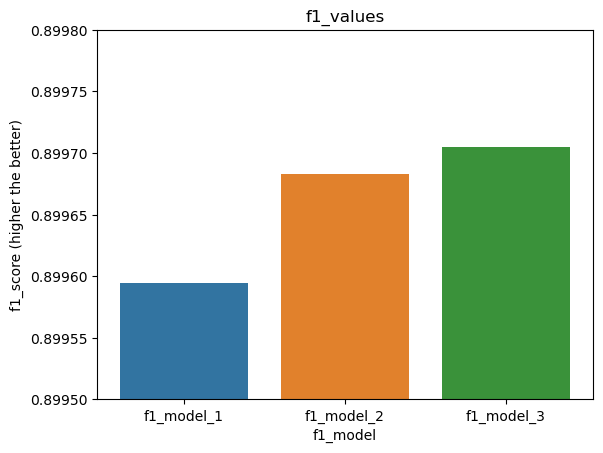

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
f1_names = ["f1_model_1", "f1_model_2", "f1_model_3"]
# create a dataframe with the values and names
df_f1 = pd.DataFrame({'f1_score (higher the better)': f1_values, 'f1_model': f1_names})

# use seaborn to plot the bar chart
sns.barplot(x='f1_model', y='f1_score (higher the better)', data=df_f1)
plt.ylim(0.8995, 0.8998)
plt.title('f1_values')
plt.plot()

In [ ]:
Best_of_the_three